什么是embedding?

1. 从数学上看, 是映射
2. 从神经⽹络的⾓度看, 是层与层之间的矩阵
3. 从特征的⾓度看, 是从⼀套特征映射到另⼀种表⽰⽅式

本节课, 我们从非监督学习和监督学习两个角度, 来讨论embedding的使用.

## Gensim

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv('/usr/local/codeData/J2/3--data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
# Create a new column for Make Model
df['Maker_Model']= df['Make']+ " " + df['Model']

# Select features from original dataset to form a new dataframe 
df1 = df[['Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size', 'Vehicle Style', 'Maker_Model']]
# For each row, combine all the columns into one column
df2 = df1.apply(lambda x: ','.join(x.astype(str)), axis=1)
# Store them in a pandas dataframe
df_clean = pd.DataFrame({'clean': df2})
# Create the list of list format of the custom corpus for gensim modeling 
sent = [row.split(',') for row in df_clean['clean']]
# show the example of list of list format of the custom corpus for gensim modeling 
sent[:2]

[['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Factory Tuner',
  'Luxury',
  'High-Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series M'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Convertible',
  'BMW 1 Series']]

In [4]:
len(sent)

11914

In [5]:
from gensim.models import Word2Vec
#model = Word2Vec(sent, min_count=1,size= 50,workers=3, window =3, sg = 1)
#__init__() got an unexpected keyword argument 'size'
model = Word2Vec(sent, min_count=1,workers=3, window =3, sg = 1,vector_size = 50)

In [6]:
model.wv['MANUAL']

array([ 0.24221696,  0.38060835,  0.12562867, -0.09507571, -0.43947017,
       -0.6988625 , -0.28589818,  0.4635715 , -0.24192888, -0.41485584,
        0.33610442, -0.18260327, -0.12653077, -0.03991868, -0.26477093,
        0.22603026,  0.66510725,  0.3385963 , -0.05756501,  0.03955402,
       -0.42272243,  0.1656748 ,  0.04063173,  0.09496655,  0.5616061 ,
       -0.12694521, -0.54892737,  0.9221862 ,  0.35374793, -0.3998786 ,
       -0.42609912, -0.08894909,  0.12954855, -0.19354099, -0.0995165 ,
       -0.31267896,  0.37643996, -0.15828085, -0.00228687,  0.06868848,
       -0.13913248, -0.0858788 , -0.36970034, -0.2984732 ,  0.49467558,
       -0.26175594, -0.08285316,  0.40465382, -0.0299684 ,  0.61990035],
      dtype=float32)

In [7]:
model.wv.similarity('Porsche 718 Cayman', 'Nissan Van')

0.8401327

In [8]:
model.wv.similarity('Porsche 718 Cayman', 'Mercedes-Benz SLK-Class')

0.9607559

In [9]:
model.wv.most_similar('Mercedes-Benz SLK-Class')[:5]

[('Mercedes-Benz SL-Class', 0.9900324940681458),
 ('Lamborghini Murcielago', 0.9886208176612854),
 ('Subaru BRZ', 0.9884623885154724),
 ('Toyota MR2 Spyder', 0.98810875415802),
 ('Lotus Evora', 0.9874714016914368)]

In [12]:
def display_closestwords_tsnescatterplot(model, word, size):
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
    close_words = model.wv.similar_by_word(word)
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)

    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
        plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
        plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

/home/yuanlin/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yuanlin/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


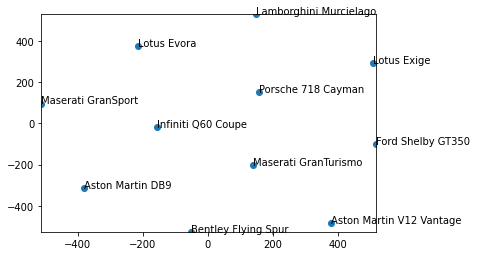

In [13]:
display_closestwords_tsnescatterplot(model, 'Porsche 718 Cayman',50) 

In [14]:
model.train([["hello", "world"]], total_examples=1, epochs=1)

(0, 2)

## Tensorflow

In [15]:
input_array = np.random.randint(1000, size=(32, 10))

In [16]:
input_array.shape

(32, 10)

In [17]:
import tensorflow as tf
import keras

2022-06-17 03:25:05.698967: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-17 03:25:05.699005: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [18]:
# from tf.keras.model import Sequential
# from tf.keras.layers import Embedding

model = keras.models.Sequential()
model.add(keras.layers.Embedding(1000, 64, input_length=10))
# the model will take as input an integer matrix of size (batch,
# input_length).
# the largest integer (i.e. word index) in the input should be no larger
# than 999 (vocabulary size).
# now model.output_shape == (None, 10, 64), where None is the batch
# dimension.

input_array = np.random.randint(1000, size=(32, 10))

model.compile('rmsprop', 'mse')
output_array = model.predict(input_array)
assert output_array.shape == (32, 10, 64)

2022-06-17 03:25:21.490690: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-06-17 03:25:21.490772: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Hapark03): /proc/driver/nvidia/version does not exist
2022-06-17 03:25:21.569796: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1/1 [==============================] - 1s 935ms/step


## Embedding Lookup

In [20]:
with tf.compat.v1.Session() as sess:
    c = np.random.random([10, 1])
    b = tf.nn.embedding_lookup(c, [0,1,2,3])
    print(c)
    print(sess.run(b))

[[0.78666827]
 [0.49149697]
 [0.07439106]
 [0.22438497]
 [0.5477709 ]
 [0.14226428]
 [0.53124516]
 [0.51347313]
 [0.43570266]
 [0.08814801]]
[[0.78666827]
 [0.49149697]
 [0.07439106]
 [0.22438497]]


2022-06-17 03:26:36.567718: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
